In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mal_df_subset = pd.read_csv('mal_df_subset_20200920.csv')
mal_df_subset

,score,studios_Production I.G,year,source_Original,source_Other,source_Manga,favorites_log
0,6.23,0,1987.0,0,1,0,0.000000
1,5.36,0,2015.0,0,1,0,0.693147
2,5.98,0,1971.0,0,1,0,0.693147
3,5.82,0,1976.0,0,1,0,0.000000
4,6.40,0,1980.0,0,1,0,1.386294
...,...,...,...,...,...,...,...
1768,8.18,0,2010.0,1,0,0,10.697339
1769,9.13,0,2011.0,0,1,0,11.818585
1770,8.19,0,2016.0,0,0,1,10.677154
1771,9.22,0,2009.0,0,0,1,12.000444


In [3]:
y=mal_df_subset['score']
x1=mal_df_subset.drop(['score'],axis=1)
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     459.0
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:14:03   Log-Likelihood:                -1229.9
No. Observations:                1773   AIC:                             2474.
Df Residuals:                    1766   BIC:                             2512.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     36.5867      2.121     17.252      0.000      32.427      40.746
studios_Production I.G     0.2788      0.079      3.532      0.000       0.124       0.434
year                      -0.0154      0.001    -14.560      0.000      -0.018      -0.013
source_Original            0.1190      0.047      2.529      0.012       0.027       0.211
source_Other               0.1046      0.045      2.303      0.021       0.016       0.194
source_Manga               0.2282      0.043      5.342      0.000       0.144       0.312
favorites_log              0.2508      0.005     47.106      0.000       0.240       0.261
==============================================================================
Omnibus:                      130.782   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.506
Skew:                          -0.527   Prob(JB):                     3.25e-51
Kurtosis:                       4.427   Cond. No.                     3.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
mal_df_subset.corr()

,score,studios_Production I.G,year,source_Original,source_Other,source_Manga,favorites_log
score,1.000000,0.097210,0.049248,-0.118453,-0.245255,0.276140,0.739630
studios_Production I.G,0.097210,1.000000,0.052043,0.014282,-0.010550,0.026968,0.064722
year,0.049248,0.052043,1.000000,-0.064364,-0.052865,0.014132,0.351132
source_Original,-0.118453,0.014282,-0.064364,1.000000,-0.356915,-0.407525,-0.144478
source_Other,-0.245255,-0.010550,-0.052865,-0.356915,1.000000,-0.524381,-0.274467
source_Manga,0.276140,0.026968,0.014132,-0.407525,-0.524381,1.000000,0.239648
favorites_log,0.739630,0.064722,0.351132,-0.144478,-0.274467,0.239648,1.000000


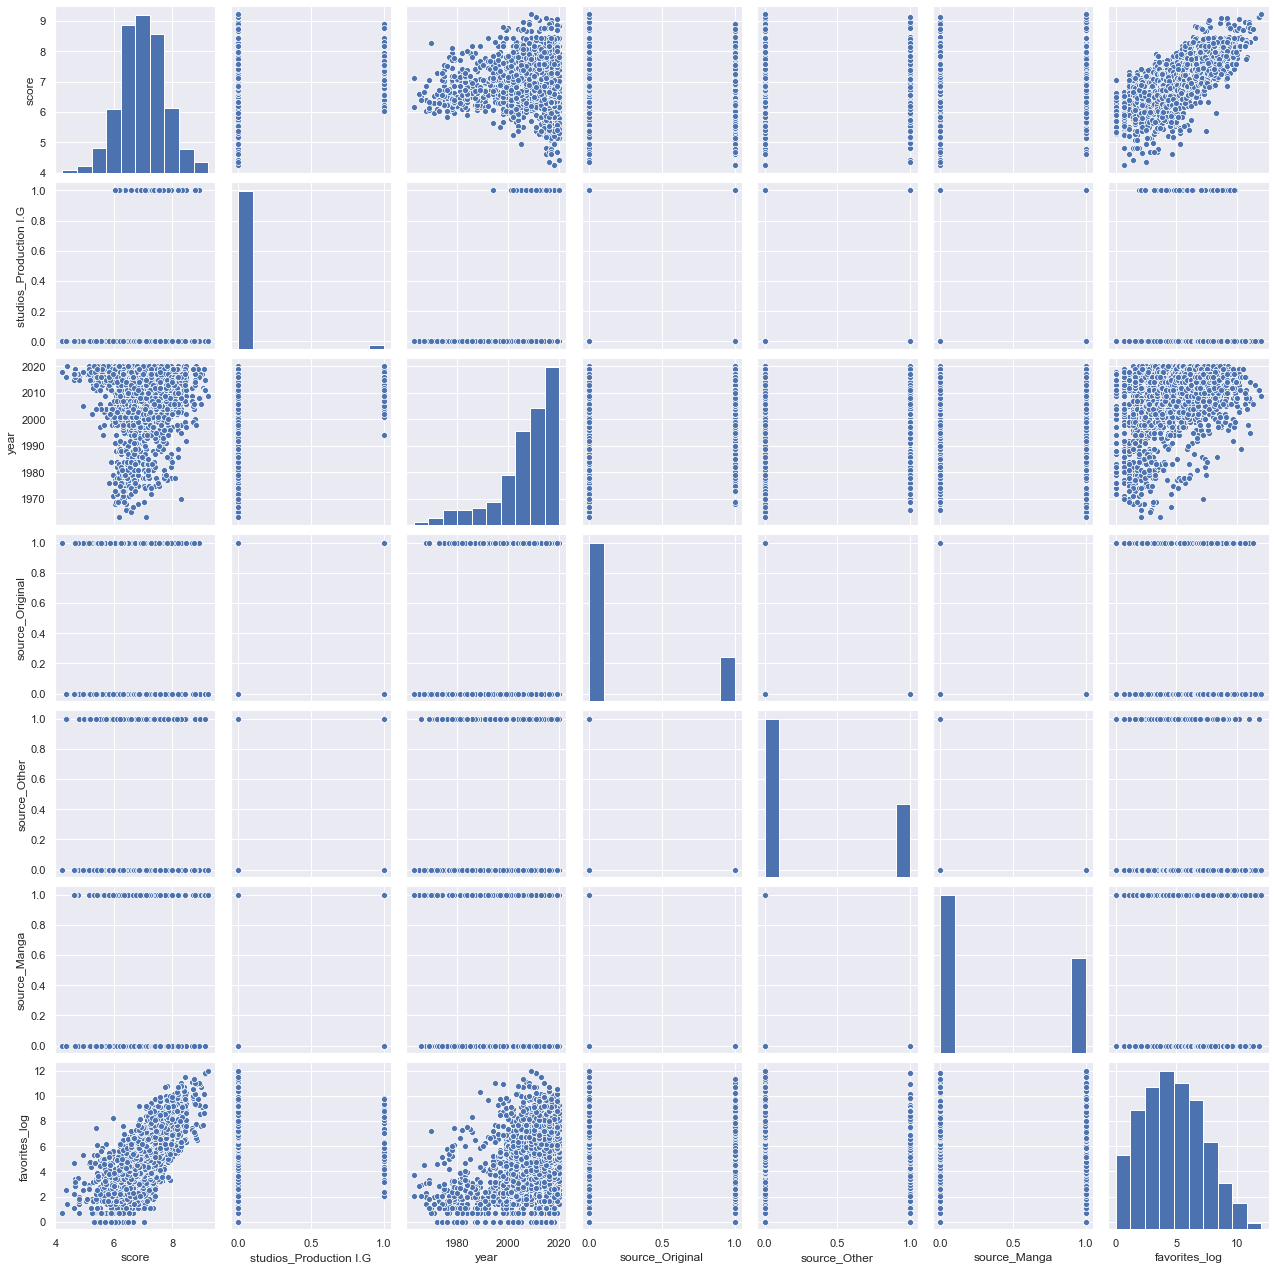

In [5]:
sns.pairplot(mal_df_subset)

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [7]:
# Step 2 - Reading the Data and Performing Basic Data Checks
print(mal_df_subset.shape)
mal_df_subset.describe()

(1773, 7)


,score,studios_Production I.G,year,source_Original,source_Other,source_Manga,favorites_log
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,6.973266,0.021997,2006.895093,0.217146,0.314721,0.374506,4.735291
std,0.774863,0.146714,11.684492,0.412419,0.464536,0.484132,2.502436
min,4.240000,0.000000,1963.000000,0.000000,0.000000,0.000000,0.000000
25%,6.460000,0.000000,2002.000000,0.000000,0.000000,0.000000,2.772589
50%,6.990000,0.000000,2010.000000,0.000000,0.000000,0.000000,4.634729
75%,7.450000,0.000000,2016.000000,0.000000,1.000000,1.000000,6.568078
max,9.220000,1.000000,2020.000000,1.000000,1.000000,1.000000,12.000444


In [8]:
# Step 3 - Creating Arrays for the Features and the Response Variable
target_column = ['score']
predictors = list(set(list(mal_df_subset.columns))-set(target_column))

# normalization via scaling of the predictors between 0 and 1.
mal_df_subset[predictors] = mal_df_subset[predictors]/mal_df_subset[predictors].max() #
mal_df_subset.describe()

,score,studios_Production I.G,year,source_Original,source_Other,source_Manga,favorites_log
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,6.973266,0.021997,0.993512,0.217146,0.314721,0.374506,0.394593
std,0.774863,0.146714,0.005784,0.412419,0.464536,0.484132,0.208529
min,4.240000,0.000000,0.971782,0.000000,0.000000,0.000000,0.000000
25%,6.460000,0.000000,0.991089,0.000000,0.000000,0.000000,0.231041
50%,6.990000,0.000000,0.995050,0.000000,0.000000,0.000000,0.386213
75%,7.450000,0.000000,0.998020,0.000000,1.000000,1.000000,0.547320
max,9.220000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Step 4 - Creating the Training and Test Datasets
X = mal_df_subset[predictors].values
y = mal_df_subset[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(1418, 6)
(355, 6)
(1418, 1)
(355, 1)


In [10]:
#Train
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 9) #shuffle = shuffle data
# cv_lr_r2 = []
# cv_lr_mae = []
# cv_lr_rsme = []

cv_lr_poly_r2 = []
cv_lr_poly_mae = []
cv_lr_poly_rsme = []

cv_rr_r2 = []
cv_rr_mae = []
cv_rr_rsme = []

cv_lasso_r2 = []
cv_lasso_mae = []
cv_lasso_rsme = []

cv_enet_r2 = []
cv_enet_mae = []
cv_enet_rsme = []

for train_ind, val_ind in kf.split(X,y): #run in 5 iterations coz n_splits = 5(doing your folds)
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
#     # Linear Regression
#     lr = LinearRegression()
#     lr.fit(X_train, y_train)
    
#     lr.fit(X_train, y_train) #r2
#     cv_lr_r2.append(lr.score(X_val, y_val))
    
#     pred_train_lr_reg = lr.predict(X_val) #MAE
#     cv_lr_mae.append(np.mean(np.abs(y_val - pred_train_lr_reg)))
    
#     cv_lr_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_lr_reg))) #RSME
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform (X_val)
    X_test_poly = poly.transform(X_test)

    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train) 
    cv_lr_poly_r2.append(lr_poly.score(X_val_poly, y_val)) #r2
    
    pred_train_lr_poly = lr_poly.predict(X_val_poly) #MAE
    cv_lr_poly_mae.append(np.mean(np.abs(y_val - pred_train_lr_poly)))
    
    cv_lr_poly_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_lr_poly))) #RSME

    #Ridge Regression
    rr = Ridge(alpha=0.01)
    rr.fit(X_train, y_train) 
    cv_rr_r2.append(rr.score(X_val, y_val)) #r2
    
    pred_train_rr= rr.predict(X_val)
    cv_rr_mae.append(np.mean(np.abs(y_val - pred_train_rr))) #MAE
    
    cv_rr_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_rr))) #RSME

    #LASSO Regression 
    model_lasso = Lasso(alpha=0.01)
    model_lasso.fit(X_train, y_train) 
    cv_lasso_r2.append(model_lasso.score(X_val, y_val)) #r2
    
    pred_train_lasso= model_lasso.predict(X_val)
    cv_lasso_mae.append(np.mean(np.abs(y_val - pred_train_lasso))) #MAE
    
    cv_lasso_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_lasso))) #RSME
    
    #ElasticNet Regression 
    model_enet = ElasticNet(alpha = 0.01)
    model_enet.fit(X_train, y_train)  
    cv_enet_r2.append(model_enet.score(X_val, y_val)) #r2
    
    pred_train_enet= model_enet.predict(X_val)
    cv_enet_mae.append(np.mean(np.abs(y_val - pred_train_enet))) #MAE
    
    cv_enet_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_enet))) #RSME

# print('Linear regression scores: ', cv_lr_r2)
# print('MAE: ', cv_lr_mae)
# print('RSME: ', cv_lr_rsme)

# print('\nLINEAR')
# print(f'mean cv R^2: {np.mean(cv_lr_r2):.3f} +- {np.std(cv_lr_r2):.3f}')
# print(f'mean MAE: {np.mean(cv_lr_mae):.3f} +- {np.std(cv_lr_mae):.3f}') 
# print(f'mean RSME: {np.mean(cv_lr_rsme):.3f} +- {np.std(cv_lr_rsme):.3f}') 

# print('Linear regression scores: ', cv_lr_poly_r2)
# print('MAE: ', cv_lr_poly_mae)
# print('RSME: ', cv_lr_poly_rsme)

print('\nPOLYNOMIAL')
print(f'mean cv R^2: {np.mean(cv_lr_poly_r2):.3f} +- {np.std(cv_lr_poly_r2):.3f}')
print(f'mean MAE: {np.mean(cv_lr_poly_mae):.3f} +- {np.std(cv_lr_poly_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_lr_poly_rsme):.3f} +- {np.std(cv_lr_poly_rsme):.3f}') 

# print('Linear regression scores: ', cv_rr_r2)
# print('MAE: ', cv_rr_mae)
# print('RSME: ', cv_rr_rsme)

print('\nRIDGE')
print(f'mean cv R^2: {np.mean(cv_rr_r2):.3f} +- {np.std(cv_rr_r2):.3f}')
print(f'mean MAE: {np.mean(cv_rr_mae):.3f} +- {np.std(cv_rr_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_rr_rsme):.3f} +- {np.std(cv_rr_rsme):.3f}')  

# print('Linear regression scores: ', cv_lasso_r2)
# print('MAE: ', cv_lasso_mae)
# print('RSME: ', cv_lasso_rsme)

print('\nLASSO')
print(f'mean cv R^2: {np.mean(cv_lasso_r2):.3f} +- {np.std(cv_lasso_r2):.3f}')
print(f'mean MAE: {np.mean(cv_lasso_mae):.3f} +- {np.std(cv_lasso_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_lasso_rsme):.3f} +- {np.std(cv_lasso_rsme):.3f}')     

# print('Linear regression scores: ', cv_enet_r2)
# print('MAE: ', cv_enet_mae)
# print('RSME: ', cv_enet_rsme)

print('\nElasticNET')
print(f'mean cv R^2: {np.mean(cv_enet_r2):.3f} +- {np.std(cv_enet_r2):.3f}')
print(f'mean MAE: {np.mean(cv_enet_mae):.3f} +- {np.std(cv_enet_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_enet_rsme):.3f} +- {np.std(cv_enet_rsme):.3f}')   


POLYNOMIAL
mean cv R^2: 0.616 +- 0.027
mean MAE: 0.365 +- 0.011
mean RSME: 0.479 +- 0.022

RIDGE
mean cv R^2: 0.604 +- 0.035
mean MAE: 0.365 +- 0.018
mean RSME: 0.486 +- 0.026

LASSO
mean cv R^2: 0.552 +- 0.038
mean MAE: 0.745 +- 0.006
mean RSME: 0.518 +- 0.027

ElasticNET
mean cv R^2: 0.545 +- 0.038
mean MAE: 0.732 +- 0.006
mean RSME: 0.521 +- 0.027


In [11]:
#Test

poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly,y) 

pred_test_lr_poly= lr_poly.predict(X_test_poly)

print('TEST RESULT (POLYNOMIAL)')
print('R^2: ', r2_score(y_test, pred_test_lr_poly))
print('MAE: ', np.mean(np.abs(y_test - pred_test_lr_poly)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_lr_poly))) #Root Mean Squared Error (RMSE)

lr_reg = Ridge(alpha=0.01)
lr_reg.fit(X,y)

pred_test_rr= rr.predict(X_test)
print('\nTEST RESULT (RIDGE)')
print('R^2: ', r2_score(y_test, pred_test_rr))
print('MAE: ', np.mean(np.abs(y_test - pred_test_rr)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 

#LASSO Regression 

lr_lasso_reg = Lasso(alpha=0.01)
lr_lasso_reg.fit(X,y)

pred_test_lasso= lr_lasso_reg.predict(X_test)
print('\nTEST RESULT (LASSO)')
print('R^2: ', r2_score(y_test, pred_test_lasso))
print('MAE: ', np.mean(np.abs(y_test - pred_test_lasso)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 


#ElasticNet Regression 
lr_enet_reg = ElasticNet(alpha=0.01)
lr_enet_reg.fit(X,y)

pred_test_enet= lr_enet_reg.predict(X_test)
print('\nTEST RESULT (ElasticNet)')
print('R^2: ', r2_score(y_test, pred_test_enet))
print('MAE: ', np.mean(np.abs(y_test - pred_test_enet)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_enet))) 


TEST RESULT (POLYNOMIAL)
R^2:  0.6311685900749783
MAE:  0.35070318236855186
RSME:  0.45900246841851045

TEST RESULT (RIDGE)
R^2:  0.6135412694449206
MAE:  0.3555490813250148
RSME:  0.46984286187770474

TEST RESULT (LASSO)
R^2:  0.5772565683242628
MAE:  0.7368165492636094
RSME:  0.49140492633692

TEST RESULT (ElasticNet)
R^2:  0.5731855026001029
MAE:  0.7243643408551369
RSME:  0.4937653987841373


In [12]:
#Split the data 60 - 20 - 20 train/val/test
X = mal_df_subset[predictors]
y = mal_df_subset[target_column]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=9)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

np.random.seed(6)

X_train_collinear = X_train
X_train_collinear.corr() 

,studios_Production I.G,favorites_log,year,source_Original,source_Manga,source_Other
studios_Production I.G,1.000000,0.076384,0.071263,-0.005824,0.047011,-0.011436
favorites_log,0.076384,1.000000,0.375277,-0.153084,0.221689,-0.273462
year,0.071263,0.375277,1.000000,-0.051210,0.011852,-0.078034
source_Original,-0.005824,-0.153084,-0.051210,1.000000,-0.404569,-0.354686
source_Manga,0.047011,0.221689,0.011852,-0.404569,1.000000,-0.522598
source_Other,-0.011436,-0.273462,-0.078034,-0.354686,-0.522598,1.000000


In [25]:
model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          9.28e-216
Time:                        13:17:45   Log-Likelihood:                -742.22
No. Observations:                1063   AIC:                             1498.
Df Residuals:                    1056   BIC:                             1533.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.6294      2.719     13.841      0.000      32.295      42.964
studios_Production I.G     0.3238      0.099      3.254      0.001       0.129       0.519
favorites_log              3.0762      0.084     36.678      0.000       2.912       3.241
year                     -32.2341      2.744    -11.749      0.000     -37.618     -26.850
source_Original            0.0839      0.061      1.373      0.170      -0.036       0.204
source_Manga               0.2343      0.055      4.248      0.000       0.126       0.343
source_Other               0.1106      0.059      1.876      0.061      -0.005       0.226
==============================================================================
Omnibus:                       70.508   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.354
Skew:                          -0.519   Prob(JB):                     2.96e-24
Kurtosis:                       4.171   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

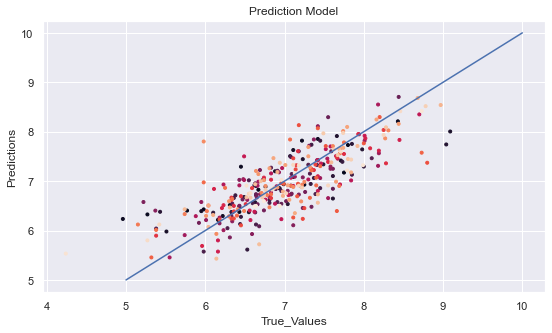

In [26]:
#predict on unseen data (Ridge)
sz = 9;
c = np.linspace(5,10,len(y_test));
plt.figure(figsize=(9,5))
plt.scatter(y_test, pred_test_lr_poly,sz,c,marker='o')
plt.xlabel('True_Values')
plt.ylabel('Predictions')
plt.title('Prediction Model')
plt.plot(np.linspace(5,10,100), np.linspace(5,10,100))

In [15]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200) #alphavec: all the alphas to try 

#IMPT HERE
lr_model_ridge = RidgeCV(alphas = alphavec, cv=5) #CV = folds, so this model will try 200 alphas in each fold -> try 1000 alphas at one go
lr_model_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [16]:
lr_model_ridge.alpha_

0.01

In [17]:
#retrain model with best alpha (RIDGE)
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)
print('RIDGE - TRAIN+VALIDATED MODEL')
print('R^2: ', r2_score(y_train, pred_train_rr))
print('MAE: ', np.mean(np.abs(y_train - pred_train_rr)))
print('RSME: ', np.sqrt(mean_squared_error(y_train,pred_train_rr))) #Root Mean Squared Error (RMSE)

pred_test_rr= rr.predict(X_test)
print('\nRIDGE - TEST RESULT')
print('R^2: ', r2_score(y_test, pred_test_rr))
print('MAE: ', np.mean(np.abs(y_test - pred_test_rr)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_rr))) #Root Mean Squared Error (RMSE)


RIDGE - TRAIN+VALIDATED MODEL
R^2:  0.6135833273733167
MAE:  score    0.369308
dtype: float64
RSME:  0.4882405960476866

RIDGE - TEST RESULT
R^2:  0.6121296608211837
MAE:  score    0.356802
dtype: float64
RSME:  0.4707001716521352


In [18]:
#Assumption 1:regression is linear in parameters and correctly specified

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y)
#     plt.plot(y, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot") #quantile to quantile plot 

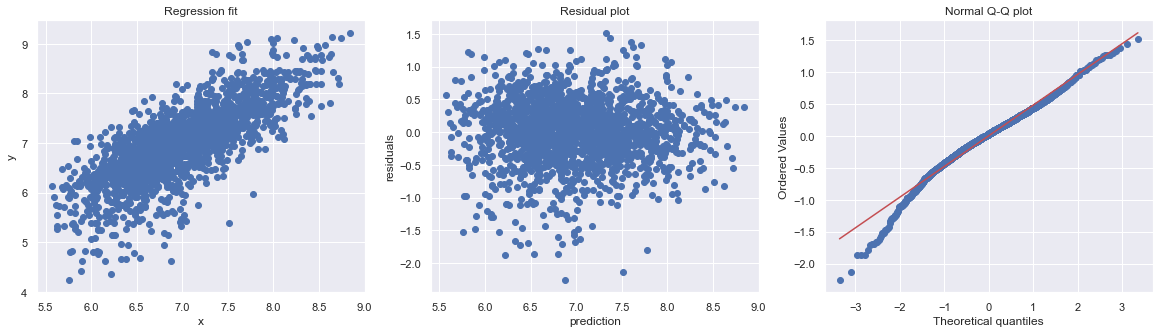

In [19]:
import scipy.stats as stats

x=mal_df_subset.drop(['score'],axis=1)
y=mal_df_subset['score']

diagnostic_plot (x, y)